Junaid Iqbal Khan

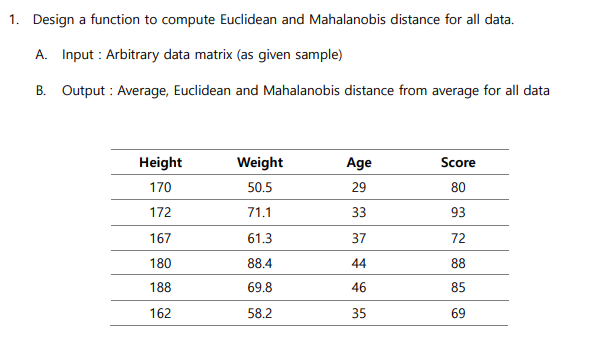

In [ ]:
import numpy as np
import pandas as pd 

data = {'Height': [170,172,167,180,188,162],
        'Weight': [50.5,71.1,61.3,88.4,69.8,58.2],
        'Age': [29,33,37,44,46,35],
        'Score': [80,93,72,88,85,69]
        }

dat = pd.DataFrame(data,columns=['Height','Weight','Age','Score'])
dat.head()

,Height,Weight,Age,Score
0,170,50.5,29,80
1,172,71.1,33,93
2,167,61.3,37,72
3,180,88.4,44,88
4,188,69.8,46,85


In [ ]:
dat=dat.to_numpy()
data=dat[0:4,:]

In [ ]:
def mahalanobis(x, data):
    x_minus_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['Height','Weight','Age','Score']].head()
R = mahalanobis(x=df_x, data=df[['Height','Weight','Age','Score']])
print("Mahalanobis Distance: ",R)

NameError: ignored

In [ ]:
def eucliean(data):
  a,b=data.shape
  Dister=np.zeros(a)
  meaner=np.mean(data)
  for i in range(b):
    Dister[i]=np.sum(np.square(data[i,:]-meaner))
    Dister[i]=Dister[i]**0.5

  return Dister

In [ ]:
R = eucliean(data)
print("Euclidean Distance: ",R)



Euclidean Distance:  [108.47745229 101.70365115  99.37507311 101.20009341]


In [ ]:
def averager(data):
  a,b=data.shape
  Dister=np.zeros(a)
  meaner=np.mean(data)
  for i in range(b):
    Dister[i]=np.sum(np.abs(data[i,:]-meaner))
    Dister[i]=Dister[i]/a

  return Dister

In [ ]:
R = averager(data)
print("Average Distance: ",R)

Average Distance:  [47.509375 40.225    44.059375 34.784375]


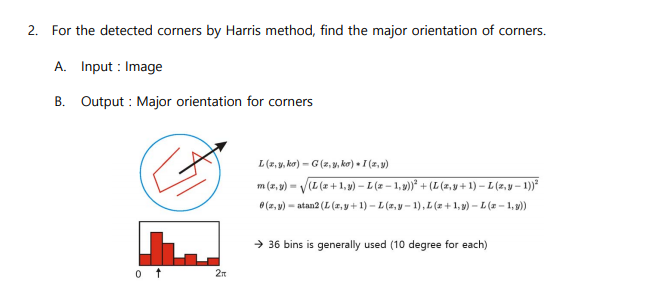

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


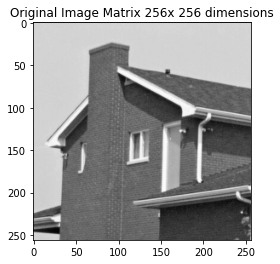

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from random import randrange
# Reference Image
imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/house.bmp')# My reference Image
imagec2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/house.bmp')# My second reference Image
image=np.dot(imagec[...,:3], [0.2989, 0.5870, 0.1140])
image2=np.dot(imagec2[...,:3], [0.2989, 0.5870, 0.1140])
row,col= image.shape
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [ ]:
def gauss_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gnormal =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gnormal


# Defining a filter

def filter(image, kernel):

    # Convolution with vertical mask
    kernel = np.flipud(np.fliplr(kernel))

    x_K = kernel.shape[0] 
    y_K = kernel.shape[1] 
    x_I = image.shape[0] 
    y_I = image.shape[1]
    x_O = int(x_I -x_K  + 1)
    y_O = int(y_I -y_K + 1)
    output = np.zeros((x_O, y_O))
    for i in range(y_O):
        for j in range(x_O):
            output[j][i] = (kernel * image[j: j + x_K, i: i + y_K]).sum()
    return output





In [ ]:
# Denoising of image using Gaussian blur, as edge detection is sensitive to noise
kernel=gauss_kernel(10,1);
image_g=filter(image,kernel)

# Defining vertical Sobel Mask
kernel_vert = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

#Defining horizonatal Sobel Mask
kernel_horz = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)


# Applying vertical Sobel Mask
kernel=kernel_vert
new_image_sobel_y=filter(image,kernel)


# Applying vertical Sobel Mask
kernel=kernel_horz
new_image_sobel_x=filter(image,kernel)

# Gradiant Map
gradient_mag = np.sqrt(np.square(new_image_sobel_x) + np.square(new_image_sobel_y))
gradient_mag *= 255.0 / gradient_mag.max()

# Angle Map
angler=np.arctan2(new_image_sobel_y, new_image_sobel_x)
angler[:,:] += np.pi


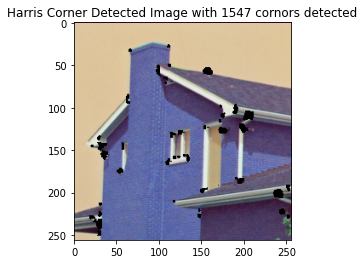

In [ ]:
IxIx = new_image_sobel_x * new_image_sobel_x
IyIy = new_image_sobel_y * new_image_sobel_y
IxIy = new_image_sobel_x * new_image_sobel_y

height, width = image.shape

window_size = 5
offset = int(window_size/2)
k = 0.04


quotient = np.zeros(image.shape)

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        window_IxIx = IxIx[y-offset:y+offset+1, x-offset:x+offset+1]
        window_IyIy = IyIy[y-offset:y+offset+1, x-offset:x+offset+1]
        window_IxIy = IxIy[y-offset:y+offset+1, x-offset:x+offset+1]

        Mxx = window_IxIx.sum()
        Myy = window_IyIy.sum()
        Mxy = window_IxIy.sum()
        det = Mxx*Myy - Mxy*Mxy
        trace = Mxx + Myy

        quotient[y,x] = det - (k * (trace**2))

threshold=0.02
count=0

X=[]
Y=[]
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        if quotient[y, x]/quotient.max() > threshold:
            X.append(y)
            Y.append(x)
            count=count+1
            imagec.itemset((y, x, 0), 0)
            imagec.itemset((y, x, 1), 0)
            imagec.itemset((y, x, 2), 0)


plt.figure()
plt.title('Harris Corner Detected Image with %1.0f' %count + ' cornors detected')
plt.imshow(imagec)

In [ ]:
def neighbours(x,y):
  X=[]
  Y=[]
  for i in range(-1,2):
    for j in range(-1,2):
      if i!=0 and i!=j:
        X.append(x+i)
        Y.append(y+j)


  return X,Y


In [ ]:
orientation_profiler=np.zeros(len(X))

for i in range(len(X)):
  x=X[i]
  y=Y[i]
  nei_x,nei_y=neighbours(x,y)
  bins=np.zeros(10)
  for coverage in range(len(nei_x)):
    temp_angle=angler[nei_x[coverage]-1,nei_y[coverage]-1]


    if 0<=temp_angle<2*np.pi/10:
      bins[0]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*np.pi/10<=temp_angle<2*2*np.pi/10:
      bins[1]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*2*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[2]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*3*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[3]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*4*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[4]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*5*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[5]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*6*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[6]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*7*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[7]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*8*np.pi/10<=temp_angle<2*3*np.pi/10:
      bins[8]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]

    elif 2*9*np.pi/10<=temp_angle<=2*10*np.pi/10:
      bins[9]+=gradient_mag[nei_x[coverage]-1,nei_y[coverage]-1]



  orientation_profiler[i]=bins.argmax(axis=0)+1

Text(0.5, 1.0, 'Distribution of bins')

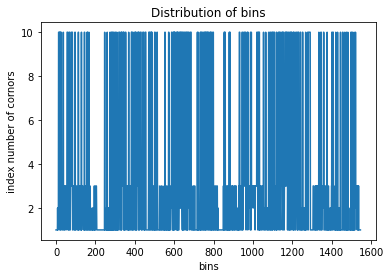

In [ ]:
plt.plot(orientation_profiler)
plt.xlabel('bins')
plt.ylabel('index number of cornors')


# Add title
plt.title('Distribution of bins')

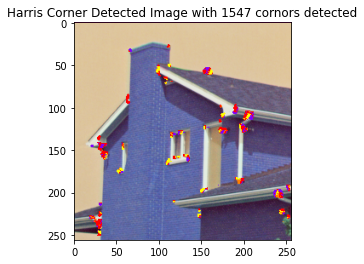

In [ ]:
for i in range(len(X)):
  if orientation_profiler[i]==1:
    imagec2.itemset((X[i], Y[i], 0), 255)
    imagec2.itemset((X[i], Y[i], 1), 0)
    imagec2.itemset((X[i], Y[i], 2), 0)

  elif orientation_profiler[i]==2:
    imagec2.itemset((X[i], Y[i], 0), 255)
    imagec2.itemset((X[i], Y[i], 1), 128)
    imagec2.itemset((X[i], Y[i], 2), 0)

  elif orientation_profiler[i]==3:
    imagec2.itemset((X[i], Y[i], 0), 255)
    imagec2.itemset((X[i], Y[i], 1), 255)
    imagec2.itemset((X[i], Y[i], 2), 0)

  elif orientation_profiler[i]==4:
    imagec2.itemset((X[i], Y[i], 0), 128)
    imagec2.itemset((X[i], Y[i], 1), 255)
    imagec2.itemset((X[i], Y[i], 2), 0)

  elif orientation_profiler[i]==5:
    imagec2.itemset((X[i], Y[i], 0), 0)
    imagec2.itemset((X[i], Y[i], 1), 255)
    imagec2.itemset((X[i], Y[i], 2), 0)

  elif orientation_profiler[i]==6:
    imagec2.itemset((X[i], Y[i], 0), 0)
    imagec2.itemset((X[i], Y[i], 1), 255)
    imagec2.itemset((X[i], Y[i], 2), 128)

  elif orientation_profiler[i]==7:
    imagec2.itemset((X[i], Y[i], 0), 0)
    imagec2.itemset((X[i], Y[i], 1), 255)
    imagec2.itemset((X[i], Y[i], 2), 255)

  elif orientation_profiler[i]==8:
    imagec2.itemset((X[i], Y[i], 0), 0)
    imagec2.itemset((X[i], Y[i], 1), 128)
    imagec2.itemset((X[i], Y[i], 2), 255)

  elif orientation_profiler[i]==9:
    imagec2.itemset((X[i], Y[i], 0), 0)
    imagec2.itemset((X[i], Y[i], 1), 0)
    imagec2.itemset((X[i], Y[i], 2), 255)

  elif orientation_profiler[i]==10:
    imagec2.itemset((X[i], Y[i], 0), 127)
    imagec2.itemset((X[i], Y[i], 1), 0)
    imagec2.itemset((X[i], Y[i], 2), 255)



plt.figure()
plt.title('Harris Corner Detected Image with %1.0f' %count + ' cornors detected')
plt.imshow(imagec2)

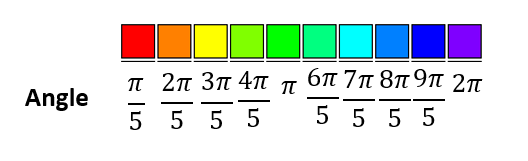